In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
x = np.load('/content/drive/My Drive/big_x_bright.npy')
y = np.load('/content/drive/My Drive/big_y_bright.npy')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import skimage
import imgaug as ia
from imgaug import augmenters as iaa
ia.seed(4)
import matplotlib.pyplot as plt

In [0]:
x_noise = skimage.util.random_noise(x, mode='gaussian', seed=None, clip=True)
gamma = iaa.GammaContrast(1.25)(images = x)
log = iaa.LogContrast(0.9)(images = x)
sigmoid = iaa.SigmoidContrast(4)(images = x)
big_x = np.vstack([x,x_noise,gamma,log,sigmoid])
big_y = np.vstack([y,y,y,y,y])


In [0]:
np.save('/content/drive/My Drive/big_x_bright.npy',big_x)

In [0]:
np.save('/content/drive/My Drive/big_y_bright.npy',big_y)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 103)

In [0]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1424, 256, 256, 3), (356, 256, 256, 3), (1424, 256, 256), (356, 256, 256))

In [0]:
y_train = np.reshape(y_train,(1424,256,256,1))
y_test = np.reshape(y_test,(356,256,256,1))

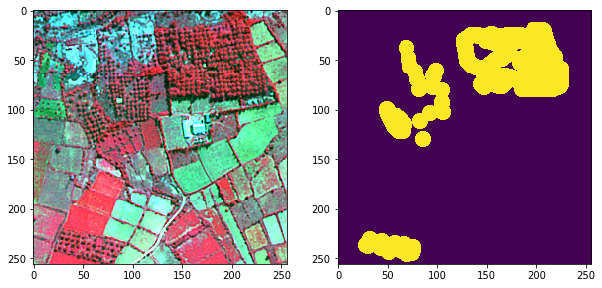

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(x_train[490])
ax[1].imshow(y_train[490].reshape(256,256))


In [0]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras

def satellite(input_img):
  
  conv_1 = Conv2D(filters = 32,kernel_size=(3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(input_img)
  batch_conv1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_1)
  activate_batch_conv1 = Activation('relu')(batch_conv1)

  conv_2 = Conv2D(filters = 32,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer = 'he_normal')(activate_batch_conv1)
  batch_conv2 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_2)
  activate_batch_conv2 = Activation('relu')(batch_conv2)
  
  
  ######### POOL_Start
  pool_1 = MaxPooling2D(pool_size = (2,2),strides= (2,2))(activate_batch_conv2)
  pool_1 = Dropout(0.025)(pool_1)  
  ######### Pool_End
  
  
  conv_3 = Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(pool_1)
  batch_conv3 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_3)
  activate_batch_conv3 = Activation('relu')(batch_conv3)

  conv_4 = Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv3)
  batch_conv4 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_4)
  activate_batch_conv4 = Activation('relu')(batch_conv4)
  
  
  ######### POOL_Start
  pool_2 = MaxPooling2D(pool_size = (2,2),strides= (2,2))(activate_batch_conv4)
  pool_2 = Dropout(0.025)(pool_2)  
  ######### POOL_End
  
  
  conv_5 = Conv2D(filters = 128,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(pool_2)
  batch_conv5 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_5)
  activate_batch_conv5 = Activation('relu')(batch_conv5)

  conv_6 = Conv2D(filters = 128,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv5)
  batch_conv6 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_6)
  activate_batch_conv6 = Activation('relu')(batch_conv6)
  
  
  ######### POOL_Start
  pool_3 = MaxPooling2D(pool_size = (2,2),strides= (2,2))(activate_batch_conv6)
  pool_3 = Dropout(0.025)(pool_3)
  ######### POOL_End
  
  
  conv_7 = Conv2D(filters = 256,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(pool_3)
  batch_conv7 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_7)
  activate_batch_conv7 = Activation('relu')(batch_conv7)

  conv_8 = Conv2D(filters = 256,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv7)
  batch_conv8 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_8)
  activate_batch_conv8 = Activation('relu')(batch_conv8)
  
  
  #########  POOL
  pool_4 = MaxPooling2D(pool_size = (2,2),strides= (2,2))(activate_batch_conv8)
  pool_4 = Dropout(0.025)(pool_4)
  #########  POOL
  
  
  conv_9 = Conv2D(filters = 512,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(pool_4)
  batch_conv9 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_9)
  activate_batch_conv9 = Activation('relu')(batch_conv9)

  conv_10 = Conv2D(filters = 512,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv9)
  batch_conv10 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_10)
  activate_batch_conv10 = Activation('relu')(batch_conv10)
  
  
  ################Upsample-1 Start
  #up1 = Lambda(lambda activate_batch_conv10: tf.image.resize_bicubic(activate_batch_conv10, (32,32), align_corners=True))(activate_batch_conv10)
  up1 = UpSampling2D(size = (2,2),interpolation = 'bilinear')(activate_batch_conv10)
  up1_conv = Conv2D(filters = 256,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(up1)
  merge_up1 = concatenate([activate_batch_conv8,up1_conv])
  drop_up1 = Dropout(0.025)(merge_up1)
  
  conv_11 = Conv2D(filters = 256,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(drop_up1)
  batch_conv11 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_11)
  activate_batch_conv11 = Activation('relu')(batch_conv11)
  
  conv_12 = Conv2D(filters = 256,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv11)
  batch_conv12 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_12)
  activate_batch_conv12 = Activation('relu')(batch_conv12)
  
  ################Upsample-1 End
  
  #upsample 2nd layer 1 start
  #up5 = Lambda(lambda activate_batch_conv10: tf.image.resize_bicubic(activate_batch_conv10, (32,32), align_corners=True))(activate_batch_conv10)
  up5 = UpSampling2D(size = (2,2),interpolation = 'bilinear')(activate_batch_conv10)
  up5_conv = Conv2D(filters = 256,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(up5)
  merge_up5 = concatenate([activate_batch_conv8,up5_conv])
  drop_up5 = Dropout(0.025)(merge_up5)
  
  conv_21 = Conv2D(filters = 256,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(drop_up5)
  batch_conv21 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_21)
  activate_batch_conv21 = Activation('relu')(batch_conv21)
  
  conv_22 = Conv2D(filters = 256,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv21)
  batch_conv22 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_22)
  activate_batch_conv22 = Activation('relu')(batch_conv22)
  
  #upsample 2nd layer 1 end
  
  
  ################Upsample-2 Start
  #up2 = Lambda(lambda activate_batch_conv12: tf.image.resize_bicubic(activate_batch_conv12, (64,64), align_corners=True))(activate_batch_conv12)
  up2 = UpSampling2D(size = (2,2),interpolation = 'bilinear')(activate_batch_conv12)
  up2_conv = Conv2D(filters = 128,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(up2)
  merge_up2 = concatenate([activate_batch_conv6,up2_conv])
  drop_up2 = Dropout(0.025)(merge_up2)
  
  conv_13 = Conv2D(filters = 128,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(drop_up2)
  batch_conv13 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_13)
  activate_batch_conv13 = Activation('relu')(batch_conv13)
  
  conv_14 = Conv2D(filters = 128,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv13)
  batch_conv14 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_14)
  activate_batch_conv14 = Activation('relu')(batch_conv14)
  
  ################Upsample-2 End
  
  
 
  #upsample 2nd layer 2 start
  #up6 = Lambda(lambda activate_batch_conv22: tf.image.resize_bicubic(activate_batch_conv22, (64,64), align_corners=True))(activate_batch_conv22)
  up6 = UpSampling2D(size = (2,2),interpolation = 'bilinear')(activate_batch_conv22)
  up6_conv = Conv2D(filters = 128,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(up6)
  merge_up6 = concatenate([activate_batch_conv6,up6_conv])
  drop_up6 = Dropout(0.025)(merge_up6)
  
  conv_23 = Conv2D(filters = 128,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(drop_up6)
  batch_conv23 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_23)
  activate_batch_conv23 = Activation('relu')(batch_conv23)
  
  conv_24 = Conv2D(filters = 128,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv23)
  batch_conv24 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_24)
  activate_batch_conv24 = Activation('relu')(batch_conv24)
  
  #upsample 2nd layer 2 end
  
  
  ################Upsample-3 Start
  
  #up3 = Lambda(lambda activate_batch_conv14: tf.image.resize_bicubic(activate_batch_conv14, (128,128), align_corners=True))(activate_batch_conv14)
  up3 = UpSampling2D(size = (2,2),interpolation = 'bilinear')(activate_batch_conv14)
  up3_conv = Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(up3)
  merge_up3 = concatenate([activate_batch_conv4,up3_conv])
  drop_up3 = Dropout(0.025)(merge_up3)
  
  conv_15 = Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(drop_up3)
  batch_conv15 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_15)
  activate_batch_conv15 = Activation('relu')(batch_conv15)
  
  conv_16 = Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv15)
  batch_conv16 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_16)
  activate_batch_conv16 = Activation('relu')(batch_conv16)

  ################Upsample-3 End
  
  
  #upsample 2nd layer 2 start

  #up7 = Lambda(lambda activate_batch_conv24: tf.image.resize_bicubic(activate_batch_conv24, (128,128), align_corners=True))(activate_batch_conv24)
  up7 = UpSampling2D(size = (2,2),interpolation = 'bilinear')(activate_batch_conv24)
  up7_conv = Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(up7)
  merge_up7 = concatenate([activate_batch_conv4,up7_conv])
  drop_up7 = Dropout(0.025)(merge_up7)
  
  conv_25 = Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(drop_up7)
  batch_conv25 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_25)
  activate_batch_conv25 = Activation('relu')(batch_conv25)
  
  conv_26 = Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv25)
  batch_conv26 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_26)
  activate_batch_conv26 = Activation('relu')(batch_conv26)
  
  #upsample 2nd layer 3 end

  
  
  ################Upsample-4 Start
  #up4 = Lambda(lambda activate_batch_conv16: tf.image.resize_bicubic(activate_batch_conv16, (256,256), align_corners=True))(activate_batch_conv16)
  up4 = UpSampling2D(size = (2,2),interpolation = 'bilinear')(activate_batch_conv16)
  up4_conv = Conv2D(filters = 32,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(up4)
  merge_up4 = concatenate([activate_batch_conv2,up4_conv])
  drop_up4 = Dropout(0.025)(merge_up4)
  
  conv_17 = Conv2D(filters = 32,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(drop_up4)
  batch_conv17 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_17)
  activate_batch_conv17 = Activation('relu')(batch_conv17)
  
  conv_18 = Conv2D(filters = 32,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv17)
  batch_conv18 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_18)
  activate_batch_conv18 = Activation('relu')(batch_conv18)
  
  conv_19 = Conv2D(filters = 2,kernel_size = (3,3),strides = (1,1),activation = 'relu',padding = 'same',kernel_initializer='he_normal')(activate_batch_conv18)
  conv_20 = Conv2D(filters = 1,kernel_size = (1,1),strides = (1,1),activation = 'sigmoid',padding = 'same',kernel_initializer='he_normal')(conv_19)

  ################Upsample-4 End
  
 
  #upsample 2nd layer 4 start
  
  #up8 = Lambda(lambda activate_batch_conv26: tf.image.resize_bicubic(activate_batch_conv26, (256,256), align_corners=True))(activate_batch_conv26)
  up8 = UpSampling2D(size = (2,2),interpolation = 'bilinear')(activate_batch_conv26)
  up8_conv = Conv2D(filters = 32,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(up8)
  merge_up8 = concatenate([activate_batch_conv2,up8_conv])
  drop_up8 = Dropout(0.025)(merge_up8)
  
  conv_27 = Conv2D(filters = 32,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(drop_up8)
  batch_conv27 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_27)
  activate_batch_conv27 = Activation('relu')(batch_conv27)
  
  conv_28 = Conv2D(filters = 32,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv27)
  batch_conv28 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_28)
  activate_batch_conv28 = Activation('relu')(batch_conv28)
  
  conv_29 = Conv2D(filters = 2,kernel_size = (3,3),strides = (1,1),activation = 'relu',padding = 'same',kernel_initializer='he_normal')(activate_batch_conv28)
  conv_30 = Conv2D(filters = 1,kernel_size = (1,1),strides = (1,1),activation = 'sigmoid',padding = 'same',kernel_initializer='he_normal')(conv_29)

 
  #upsample 2nd layer 4 end
  
  model = Model(input = [input_img], output =[conv_20,conv_30])
  return model
  



Using TensorFlow backend.


In [0]:
y_inv_train  = np.logical_not(y_train)
y_inv_test = np.logical_not(y_test)

In [0]:
y_inv_train = 1 * y_inv_train
y_inv_test = 1  * y_inv_test

In [0]:
input_img = Input((256,256,3))
model = satellite(input_img)
#model.summary()
from keras.callbacks import *
filepath = "/content/drive/My Drive/checks/weights-improvement-{epoch:02d}-{val_conv2d_33_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_conv2d_33_acc', verbose=1, save_best_only=True, mode='max', period=10)
callbacks_list = [checkpoint]
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"],loss_weights =[1,0.8])
model.load_weights('/content/drive/My Drive/checks/weights-improvement-60-0.98.hdf5')

W0807 06:18:18.812180 140640733067136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0807 06:18:18.853996 140640733067136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 06:18:18.864429 140640733067136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0807 06:18:18.914034 140640733067136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0807 06:18:18.915341

In [0]:
#model.save_weights(checkpoint_path.format(epoch=0))

results = model.fit([x_train], [y_train,y_inv_train], batch_size=4, epochs=100,
                    validation_data=(x_test, [y_test,y_inv_test]),initial_epoch = 60,callbacks=callbacks_list)

Train on 1424 samples, validate on 356 samples
Epoch 61/100
1424/1424 [==============================] - 241s 169ms/step - loss: 0.0681 - conv2d_33_loss: 0.0364 - conv2d_38_loss: 0.0397 - conv2d_33_acc: 0.9849 - conv2d_38_acc: 0.9837 - val_loss: 0.0897 - val_conv2d_33_loss: 0.0503 - val_conv2d_38_loss: 0.0492 - val_conv2d_33_acc: 0.9803 - val_conv2d_38_acc: 0.9807
Epoch 62/100
1424/1424 [==============================] - 228s 160ms/step - loss: 0.0772 - conv2d_33_loss: 0.0412 - conv2d_38_loss: 0.0449 - conv2d_33_acc: 0.9830 - conv2d_38_acc: 0.9817 - val_loss: 0.0777 - val_conv2d_33_loss: 0.0405 - val_conv2d_38_loss: 0.0465 - val_conv2d_33_acc: 0.9835 - val_conv2d_38_acc: 0.9812
Epoch 63/100
1424/1424 [==============================] - 229s 160ms/step - loss: 0.0761 - conv2d_33_loss: 0.0410 - conv2d_38_loss: 0.0438 - conv2d_33_acc: 0.9832 - conv2d_38_acc: 0.9821 - val_loss: 0.2222 - val_conv2d_33_loss: 0.1145 - val_conv2d_38_loss: 0.1347 - val_conv2d_33_acc: 0.9640 - val_conv2d_38_acc: 

In [0]:
model.save('/content/drive/My Drive/Siamese_unet_1_08_1780_contrast.h5')

In [0]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
lap = iaa.AdditiveLaplaceNoise(scale = (0,255*0.1))(images = (x*255).astype('uint8'))
#?iaa.AdditiveLaplaceNoise

In [0]:
cloud = iaa.GammaContrast(1.25)(images = x[3])
#cloud = cloud.augment_image(x[3])
#ia.imshow(cloud)

'2.2.4'

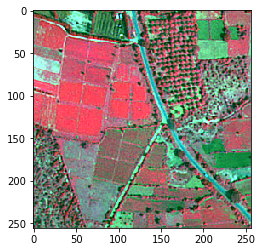

In [0]:
plt.imshow(x[3])

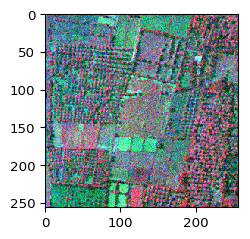

In [0]:
ia.imshow(x_noise[555])

In [4]:
import keras
import numpy as np
from skimage.filters import * 
x = np.load('/content/drive/My Drive/npy_files/raw_images.npy')
y  =np.load('/content/drive/My Drive/npy_files/mask_images.npy')
model = keras.models.load_model('/content/drive/My Drive/checks/weights-improvement-90-0.99.hdf5')


W0811 13:12:06.875616 140082395113344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 13:12:06.937062 140082395113344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0811 13:12:06.969961 140082395113344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 13:12:06.971427 140082395113344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0811 13:12:06.97491

W0811 15:01:56.492769 140082395113344 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


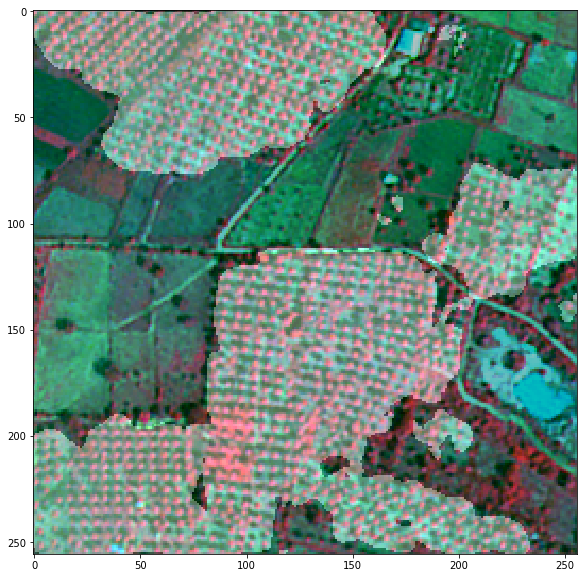

In [31]:
i = 20
[image,image2] = model.predict(x[i].reshape(1,256,256,3))
image = image.reshape(256,256)
thresh = threshold_minimum(image)
binary = image > thresh
kk = np.zeros((256,256,3))
kk[:,:,0] = binary
kk[:,:,1] = binary
kk[:,:,2] = binary
blend = x[i] * 0.75 + kk * 0.33
plt.figure(figsize = (10,10))
plt.imshow(blend)

W0811 14:34:50.799925 140082395113344 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


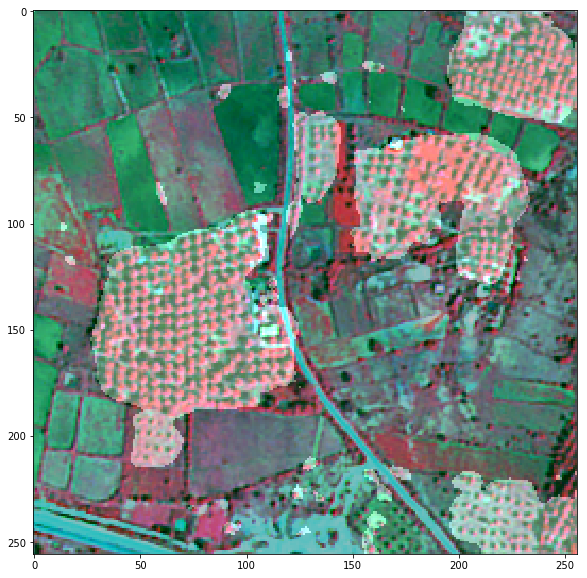

In [22]:
i = 16
[image,image2] = model.predict(x[i].reshape(1,256,256,3))
image = image.reshape(256,256)
thresh = threshold_yen(image)
binary = image > thresh
kk = np.zeros((256,256,3))
kk[:,:,0] = binary
kk[:,:,1] = binary
kk[:,:,2] = binary
blend = x[i] * 0.75 + kk * 0.33
plt.figure(figsize = (10,10))
plt.imshow(blend)

W0810 22:07:46.927516 139764784355200 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


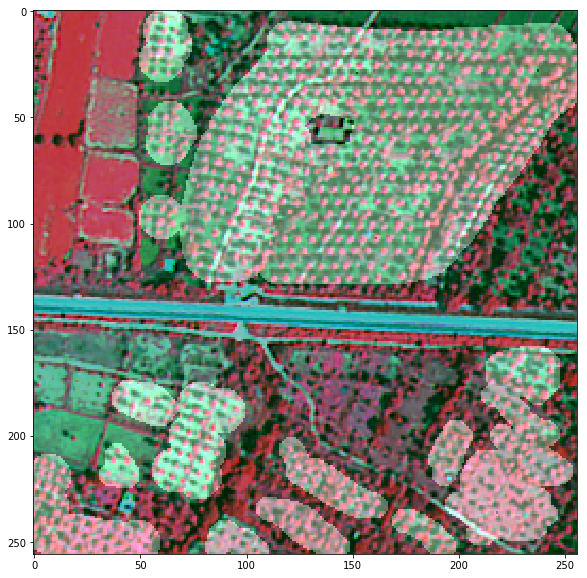

In [64]:
i = 12
#[image,image2] = model.predict(x[i].reshape(1,256,256,3))
#image = image.reshape(256,256)
#thresh = threshold_isodata(image)
#binary = image > thresh
kk = np.zeros((256,256,3))
kk[:,:,0] = y[i].reshape(256,256)
kk[:,:,1] =  y[i].reshape(256,256)
kk[:,:,2] =  y[i].reshape(256,256)
blend = x[i] * 0.75 + kk * 0.33
plt.figure(figsize = (10,10))
plt.imshow(blend)

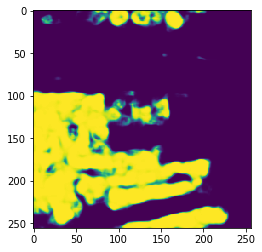

In [52]:
plt.imshow(image)

W0811 15:25:04.015013 140082395113344 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


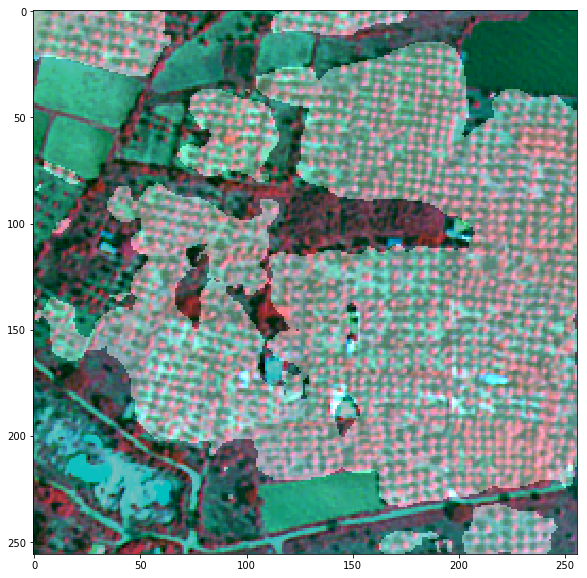

In [32]:
i = 21
[image_coco,inv] = model.predict(x[i].reshape(1,256,256,3))


image_coco = image_coco.reshape(256,256)
thresh = threshold_minimum(image_coco)
binary = image_coco > thresh
y_coco = binary.reshape(256,256)


inv =inv.reshape(256,256)
thresh = threshold_minimum(inv)
inv2 = inv > thresh
y_inverted_coco = inv2.reshape(256,256)

tree=y_coco.reshape(256,256)
not_tree=y_inverted_coco.reshape(256,256)
an=np.logical_not(not_tree)
res=np.logical_or(tree,an)


kk = np.zeros((256,256,3))
kk[:,:,0] = res
kk[:,:,1] = res
kk[:,:,2] = res
blend = x[i] * 0.75 + kk * 0.33
plt.figure(figsize = (10,10))
plt.imshow(blend)



(256, 256)